# <center>LAB 5 - Decision Tree

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **4 BSC DS** <br>

---------------
        
<u>**Objectives**</u>  
    
- Make use of Relevant Visualisations, Comments, Documentation, and Explanations wherever it is necessary during the execution of the lab. You may not perform extensive EDA on the dataset. Relevant Evaluation Metrics must be used and illustrated through the execution of the lab. Comments for the same are expected.

**PART A - Optional**

- Create a Class named DecisionTree for implementing Binary Classification Problems, based on Gini Impurity Loss Function. While initialising, these should be another parameter named as maxDepth for restricting the growth of the tree beyond a certain height.

- The methods should be - train() [trains a model based on Gini Impurity], test() [returns predicted values for input variables]. You may proceed to Part C after completing Part A.

**PART B - Linear Regression Library**

- Import the sklearn.tree.DecisionTreeClassifier, and perform classification on the TItanic Dataset. The train and test datasets are given separately, due to which there is no need of train_test_split function.

- Comment on the accuracy of the model on prediction. Comment on the accuracy, when the following parameters are modified - Criterion (gini / entropy / log_loss), max_depth, max_leaf_nodes, and random_state

**PART C - Dummy Classifier**

- Compare your results with Dummy Classifier with the following parameters - most_frequent, prior, uniform, constant, and comment on the results. 
    
-------------------
    
<u> **Problem Statement**</u>  
- Implementing Decision Tree
    
-----------------    

    
<u>**Methods**</u> 
- Decision Tree using **DecisionTreeClassifier()**
- 
    
------------------
    
<u>**Observations**</u>
- Importing the dataset from csv file in the dataset.
- The Accuracy with the Decision Tree Algorithm is 66% which is greater than the Dummy Classifier i.e. 61%.
- The model showed high log_loss and there is an average Gini_Impurity.
    
------------------
 
<u>**Results**</u>
- In Decison Tree internal nodes represent the conditions and the leaf nodes represent the decision based on the conditions.
- It's possible to validate a model using statistical test which makes it possible to account for the reliability of the model and performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

------------------
 
<u>**Learnings & Reflection**</u>
- Decision Tree Algorithm helps to analyze the possible consequences of a decision, and as an algorithm accesses more data, it can predict outcomes for future data.

------------------

<u>**References**</u> <br> 
1. [Pandas Documendation](https://pandas.pydata.org/)<br>
2. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)<br>

***************
    
[Github Link](https://github.com/Krishnaa-tech/ML-Projects.git)<br>
------------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [2]:
import pandas as pd 
import numpy as np 
from collections import Counter
class Node: 
    def __init__(self,Y: list,X: pd.DataFrame,min_samples_split=None,max_depth=None,depth=None,node_type=None,rule=None):

        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Calculating the counts of Y in the node 
        self.counts = Counter(Y)

        # Getting the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node 
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat 

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain 
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame):

        predictions = []

        for x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        
        return predictions

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat

In [3]:
# Reading data
d = pd.read_csv("D:/COLLEGE DATA/SEM IV/BDS471L - Machine Learning/train.csv")[['Age', 'Fare', 'Survived']].dropna()

# Constructing the X and Y matrices
X = d[['Age', 'Fare']]
Y = d['Survived'].values.tolist()

# Initiating the Node
root = Node(Y, X, max_depth=3, min_samples_split=100)

# Getting teh best split
root.grow_tree()

# Printing the tree information 
root.print_tree()

Root
   | GINI impurity of the node: 0.48
   | Class distribution in the node: {0: 424, 1: 290}
   | Predicted class: 0
|-------- Split rule: Fare <= 52.277
           | GINI impurity of the node: 0.44
           | Class distribution in the node: {0: 389, 1: 195}
           | Predicted class: 0
|---------------- Split rule: Fare <= 10.481
                   | GINI impurity of the node: 0.32
                   | Class distribution in the node: {0: 192, 1: 47}
                   | Predicted class: 0
|------------------------ Split rule: Age <= 32.5
                           | GINI impurity of the node: 0.37
                           | Class distribution in the node: {0: 134, 1: 43}
                           | Predicted class: 0
|------------------------ Split rule: Age > 32.5
                           | GINI impurity of the node: 0.12
                           | Class distribution in the node: {0: 58, 1: 4}
                           | Predicted class: 0
|---------------- Split rule

**Observation** - *The best first split is the fare feature at value 52.227.*

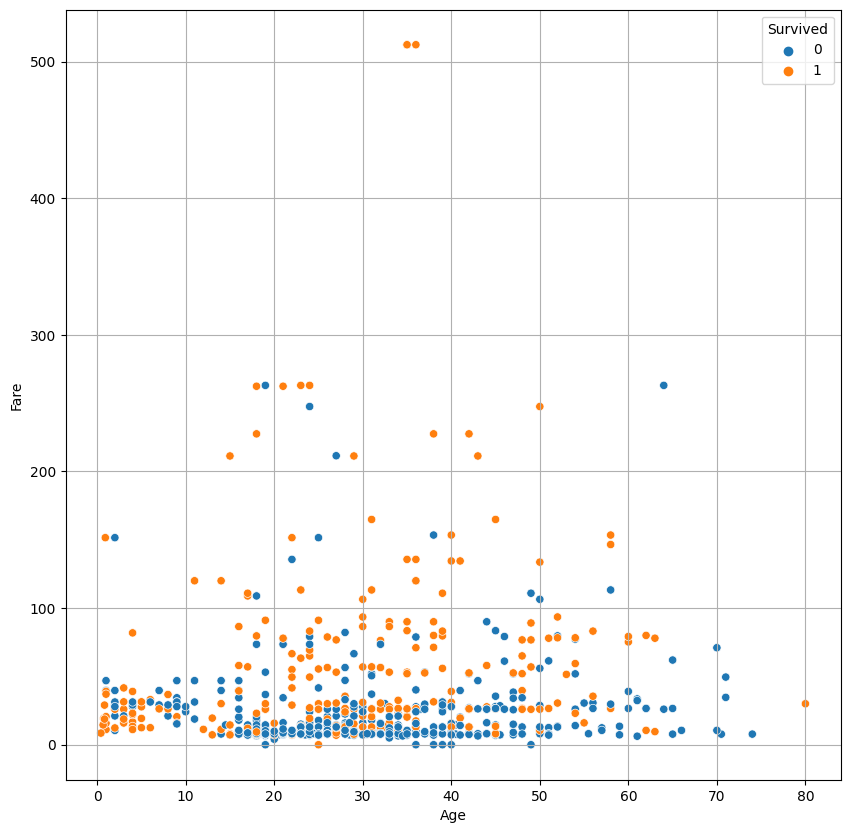

In [4]:
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Fare', x='Age', data=d, hue='Survived')
plt.grid()
plt.show()

In [5]:
print(f"Number of observations: {d.shape[0]}")

Number of observations: 714


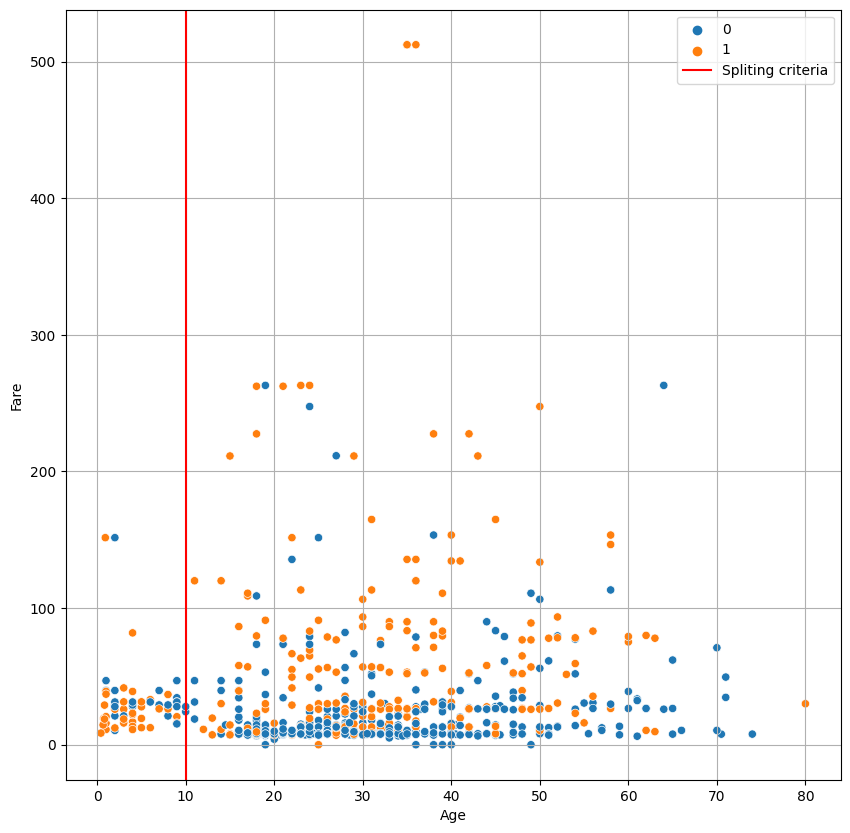

In [6]:
# Define the split value 
age_split = 10

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Fare', x='Age', data=d, hue='Survived')
plt.grid()

# Adding the vertical line
plt.axvline(age_split, label='Spliting criteria', color='red')
plt.legend()
plt.show()

In [7]:
# Getting the left and right datasets
left = d[d['Age']<=age_split]
right = d[d['Age']>age_split]

In [8]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 64
Observations to the right of criteria: 650


In [9]:
left.groupby('Survived', as_index=False).size()

,Survived,size
0,0,26
1,1,38


In [10]:
right.groupby('Survived', as_index=False).size()

,Survived,size
0,0,398
1,1,252


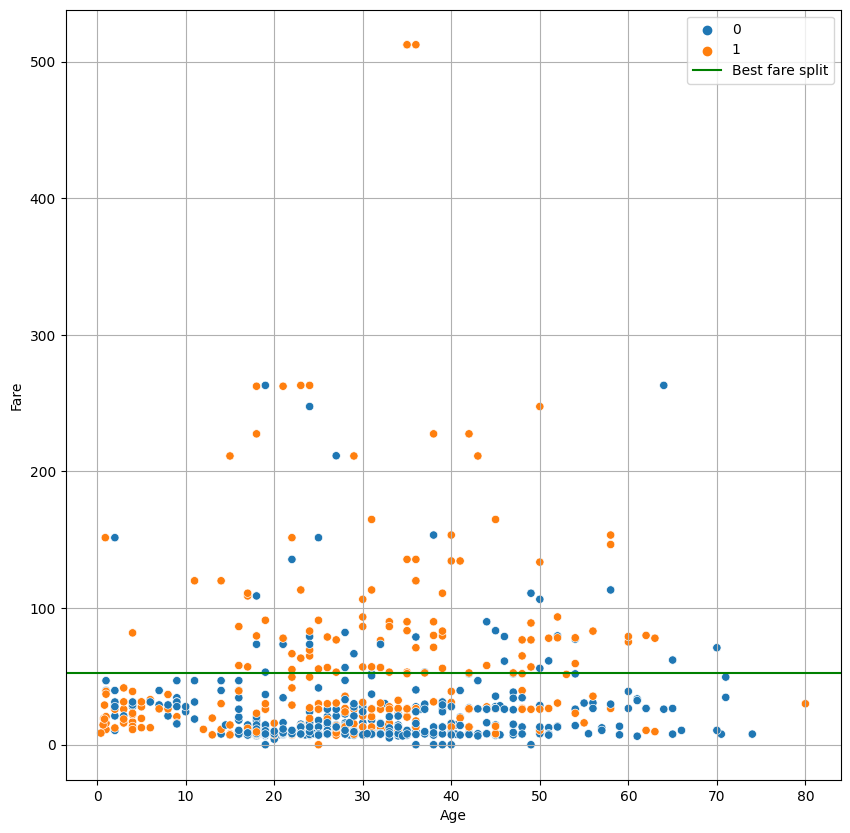

In [11]:
# Define the split value 
age_split = 8 

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Fare', x='Age', data=d, hue='Survived')
plt.grid()

# Adding the split line
plt.axhline(52.77, label='Best fare split', color='green')
plt.legend()
plt.show()

## Question 2:

In [12]:
train_df = pd.read_csv("D:/COLLEGE DATA/SEM IV/BDS471L - Machine Learning/train.csv")
# Dropping missing values
# Defining the X and Y matrices
Y = train_df['Survived'].values
X = train_df[['Age', 'Fare']]
# Saving the feature list 
features = list(X.columns)

In [13]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [14]:
results = mean_imputer.fit_transform(train_df[['Age']])
new = []
new = results.round()

In [15]:
train_df['New_Age'] = new
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,30.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [16]:
# Defining the X and Y matrices
Y = train_df['Survived'].values
X = train_df[['New_Age']]

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.3)

In [18]:
import pandas as pd
from sklearn import tree
clf= tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [19]:
Y_pred=clf.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0]


[Ellipsis]

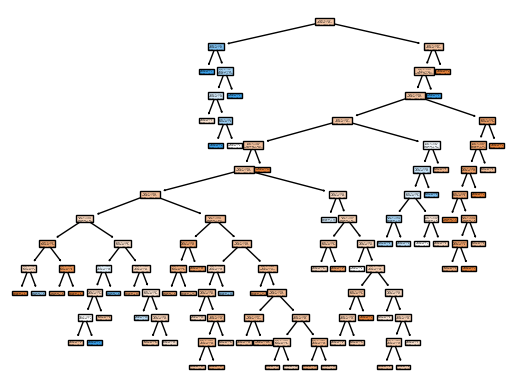

In [20]:
tree.plot_tree(clf, filled="true")
[...]

In [21]:
clf.get_depth()

14

In [22]:
clf.get_n_leaves()

59

In [23]:
clf.score(X,Y)

0.6599326599326599

In [24]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("titanic") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Question 3:

In [25]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,Y)
DummyClassifier(strategy='most_frequent')
#Perform classification on test vectors X
dummy_clf.predict(X)
#Returns the Mean on given Sample Data
dummy_clf.score(X,Y)

0.6161616161616161

**Observation** - *The Accuracy with the Decision Tree Algorithm is 66% which is greater than the Dummy Classifier i.e. 61%.*

In [28]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69       147
           1       0.56      0.17      0.25       121

    accuracy                           0.56       268
   macro avg       0.56      0.53      0.47       268
weighted avg       0.56      0.56      0.49       268

